In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset using pandas
filename = "../../input/prophet/SPXS_5yr.csv"
#filename2 = "../../input/prophet/SPXS.csv"
data = pd.read_csv(filename) 
#data2 = pd.read_csv(filename2)
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-07,93.199997,97.000000,91.500000,91.699997,89.855888,1338400
1,2015-07-08,93.900002,96.699997,93.400002,96.300003,94.363388,1047300
2,2015-07-09,92.750000,95.900002,92.349998,95.800003,93.873444,836600
3,2015-07-10,92.400002,93.599998,91.500000,92.199997,90.345825,1050500
4,2015-07-13,90.199997,90.250000,89.000000,89.150002,87.357178,865500


In [2]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,41.998268,42.655401,41.377482,41.946553,41.177933,7.173103e+06
std,27.177349,27.707148,26.698356,27.145305,26.532779,1.403214e+07
min,7.250000,7.300000,7.120000,7.130000,7.130000,2.229000e+05
25%,21.185001,21.459999,20.805000,21.175000,20.872929,1.007900e+06
50%,30.490000,31.500000,29.900000,30.770000,30.182909,2.216500e+06
75%,61.824998,62.550002,61.250000,61.799999,60.557188,6.132400e+06
max,122.500000,126.250000,111.400002,122.199997,119.742523,1.128298e+08


In [3]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2015-07-07,91.699997
1,2015-07-08,96.300003
2,2015-07-09,95.800003
3,2015-07-10,92.199997
4,2015-07-13,89.150002


In [4]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

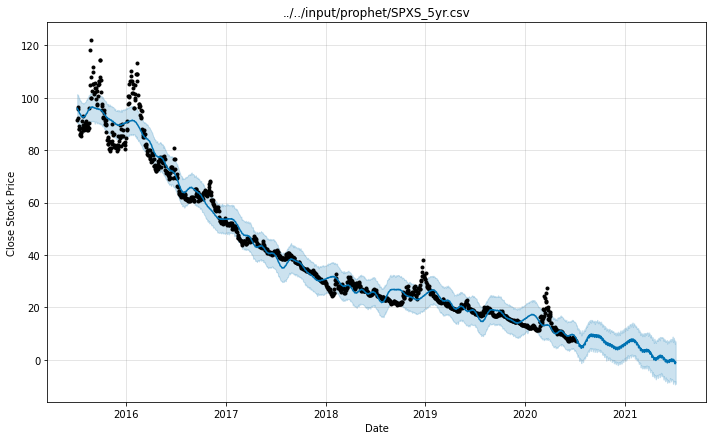

In [5]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title(filename)
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

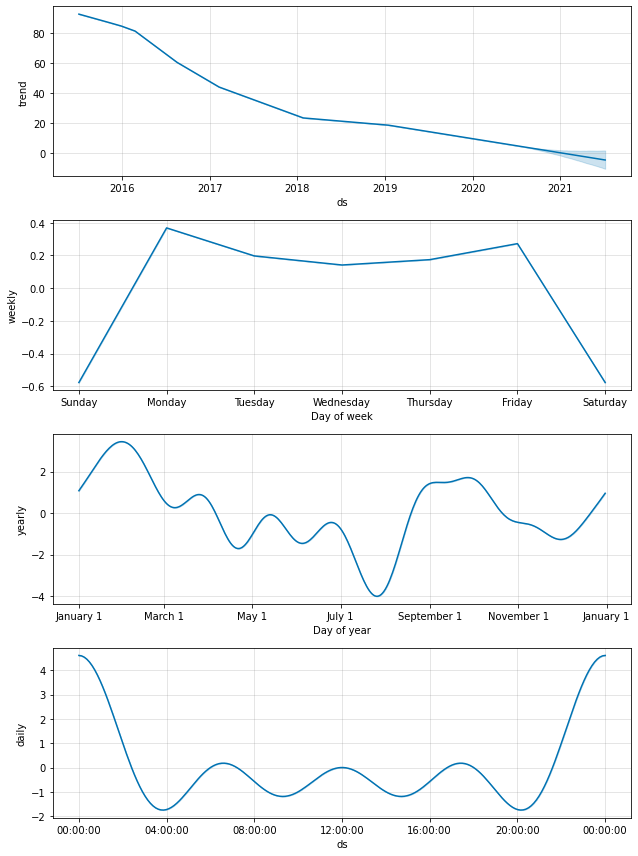

In [6]:
m.plot_components(prediction)
plt.show()